### INF-510, 2016, Claudio Torres, ctorres@inf.utfsm.cl. DI-UTFSM
#### Textbook: Lloyd N. Trefethen, Spectral Methods in MATLAB, SIAM, Philadelphia, 2000

# Spectral differentiation++

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import scipy.sparse.linalg as sp
from sympy import *
import sympy as sym
from scipy.linalg import toeplitz

Defining some symbolic variables

In [3]:
N = 10
y = sym.Symbol('y', real=True)
f = exp(sin(pi*y))
fv = sym.lambdify([y], f, 'numpy')
fp = sym.diff(f)
fpv = sym.lambdify([y], fp, 'numpy')
fp2 = sym.diff(fp)
fp2v = sym.lambdify([y], fp2, 'numpy')
# We remove the first point since we consider periodic boundary conditions
x = np.linspace(-1,1,N+1)[1:]
xx = np.linspace(-1,1,10*N)

u = fv(x)

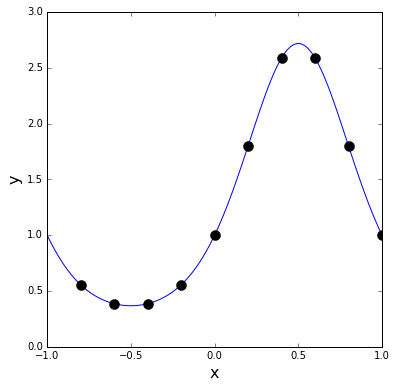

In [5]:
# The variable M is used for changing the default size of the figures
M=6
plt.figure(figsize=(M,M))
# This plots the "continuos" function
plt.plot(xx,fv(xx),'-')
# This plots the "discrete" function
plt.plot(x,u,'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

## A first Differentiation Matrix

In [8]:
def my_D(N):
    h=2./(N)
    c=np.zeros(N)
    c[1]=-1
    c[-1]=1
    D=toeplitz(c/(2.*h),r=-c/(2.*h))
    return D
n=6
D=my_D(n)
print(D*2./(n))
D=my_D(N)
D2=np.dot(D,D)
print(D2)

[[ 0.   0.5 -0.  -0.  -0.  -0.5]
 [-0.5  0.   0.5 -0.  -0.  -0. ]
 [ 0.  -0.5  0.   0.5 -0.  -0. ]
 [ 0.   0.  -0.5  0.   0.5 -0. ]
 [ 0.   0.   0.  -0.5  0.   0.5]
 [ 0.5  0.   0.   0.  -0.5  0. ]]
[[-12.5    0.     6.25   0.     0.     0.     0.     0.     6.25   0.  ]
 [  0.   -12.5    0.     6.25   0.     0.     0.     0.     0.     6.25]
 [  6.25   0.   -12.5    0.     6.25   0.     0.     0.     0.     0.  ]
 [  0.     6.25   0.   -12.5    0.     6.25   0.     0.     0.     0.  ]
 [  0.     0.     6.25   0.   -12.5    0.     6.25   0.     0.     0.  ]
 [  0.     0.     0.     6.25   0.   -12.5    0.     6.25   0.     0.  ]
 [  0.     0.     0.     0.     6.25   0.   -12.5    0.     6.25   0.  ]
 [  0.     0.     0.     0.     0.     6.25   0.   -12.5    0.     6.25]
 [  6.25   0.     0.     0.     0.     0.     6.25   0.   -12.5    0.  ]
 [  0.     6.25   0.     0.     0.     0.     0.     6.25   0.   -12.5 ]]


## Let's differentiate our discrete function!

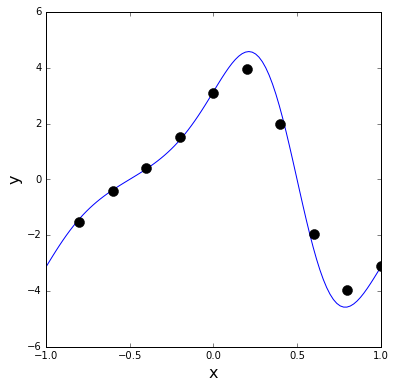

In [11]:
plt.figure(figsize=(M,M))
# This is the "exact" derivative
plt.plot(xx,fpv(xx),'-')
# Here we differentiate our "discrete" function
Up=np.dot(D,u)
plt.plot(x,Up,'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

## Let's compute the second derivate!

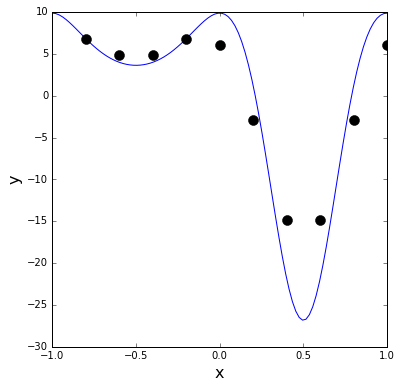

In [14]:
plt.figure(figsize=(M,M))
plt.plot(xx,fp2v(xx),'-')
plt.plot(x,np.dot(D2,u),'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.show()

## Let's study how fast our approximation converges.

/Users/claudio/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


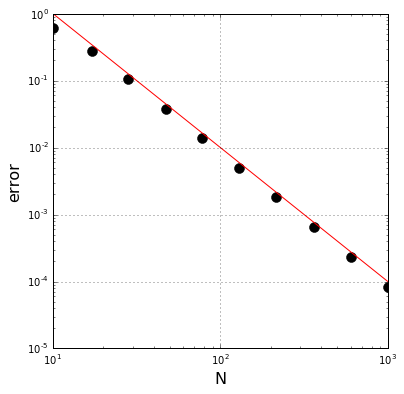

In [9]:
Ne = 10
errors=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3,Ne))
for i in np.arange(Ne):
    N = Ns[i]
    D = my_D(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20)
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.show()

## Can we find a faster approximation?

In [10]:
def my_D4th(N):
    h=2./N
    c=np.zeros(N)
    c[1]=-2./3.
    c[2]=1./12.
    c[-1]=2./3.
    c[-2]=-1./12.
    D=toeplitz(c/h,r=-c/h)
    return D
n=6
D=my_D4th(n)
print(D*2./n)

[[ 0.          0.66666667 -0.08333333 -0.          0.08333333 -0.66666667]
 [-0.66666667  0.          0.66666667 -0.08333333 -0.          0.08333333]
 [ 0.08333333 -0.66666667  0.          0.66666667 -0.08333333 -0.        ]
 [ 0.          0.08333333 -0.66666667  0.          0.66666667 -0.08333333]
 [-0.08333333  0.          0.08333333 -0.66666667  0.          0.66666667]
 [ 0.66666667 -0.08333333  0.          0.08333333 -0.66666667  0.        ]]


/Users/claudio/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


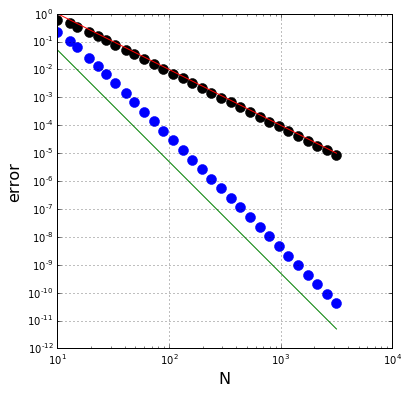

In [11]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = Ns[i]
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)

plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20)
plt.loglog(Ns,errors4th,'b.',markersize=20)
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.loglog(Ns,500*Ns**(-4),'g',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.show()

# Can we find something even better?

In [12]:
def my_D_spec(N):
    h=(2./N)*np.pi
    c=np.zeros(N)
    j=np.arange(1,N)
    c[1:]=0.5*((-1)**j)*(np.tan(j*h/2.)**(-1))
    r=np.zeros(N)
    r[0]=c[0]
    r[1:]=c[-1:0:-1]
    D=np.pi*toeplitz(c,r=r)
    return D
print(my_D_spec(5))

[[ 0.         -2.16201566  0.51038267  0.51038267 -2.16201566]
 [-2.16201566  0.         -2.16201566  0.51038267  0.51038267]
 [ 0.51038267 -2.16201566  0.         -2.16201566  0.51038267]
 [ 0.51038267  0.51038267 -2.16201566  0.         -2.16201566]
 [-2.16201566  0.51038267  0.51038267 -2.16201566  0.        ]]


/Users/claudio/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/Users/claudio/anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:6: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


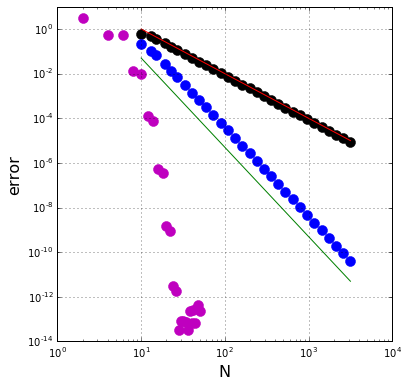

In [13]:
Ne = 30
errors=np.zeros(Ne)
errors4th=np.zeros(Ne)
Ns = np.ceil(np.logspace(1,3.5,Ne))
for i in np.arange(Ne):
    N = Ns[i]
    D = my_D(N)
    D4th = my_D4th(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    Up = np.dot(D,u)
    Up4th = np.dot(D4th,u)
    up = fpv(x)
    errors[i] = np.linalg.norm(Up-up,np.inf)
    errors4th[i] = np.linalg.norm(Up4th-up,np.inf)
    
NsS = np.ceil(np.arange(2,51,2))
NeS= NsS.shape[0]
errorsSpectral=np.zeros(NeS)
for i in np.arange(NeS):
    N = NsS[i]
    DSpectral = my_D_spec(N)
    x = np.linspace(-1,1,N+1)[1:]
    u = fv(x)
    UpSpectral = np.dot(DSpectral,u)
    up = fpv(x)
    errorsSpectral[i] = np.linalg.norm(UpSpectral-up,np.inf)    

plt.figure(figsize=(M,M))
plt.loglog(Ns,errors,'k.',markersize=20)
plt.loglog(Ns,errors4th,'b.',markersize=20)
plt.loglog(NsS,errorsSpectral,'m.',markersize=20)
plt.loglog(Ns,100*Ns**(-2),'r',markersize=20)
plt.loglog(Ns,500*Ns**(-4),'g',markersize=20)
plt.xlabel('N',fontsize=16)
plt.ylabel('error',fontsize=16)
plt.grid(True)
plt.show()

# Bonus

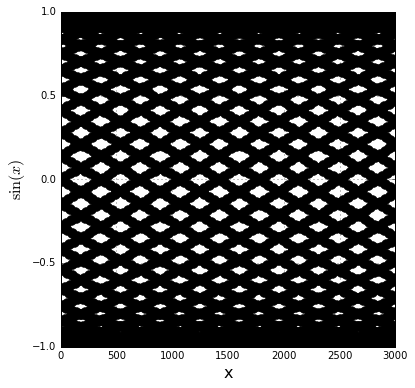

In [132]:
x=np.arange(1,3001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('$\sin(x)$',fontsize=16)
plt.grid(True)
plt.show()

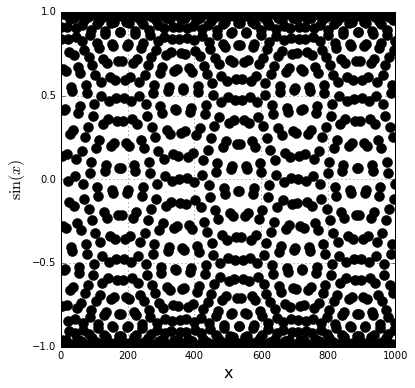

In [133]:
x=np.arange(1,1001)
plt.figure(figsize=(M,M))
plt.plot(x,np.sin(x),'k.',markersize=20)
plt.xlabel('x',fontsize=16)
plt.ylabel('$\sin(x)$',fontsize=16)
plt.grid(True)
plt.show()